# Clustering with K-means 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import cluster

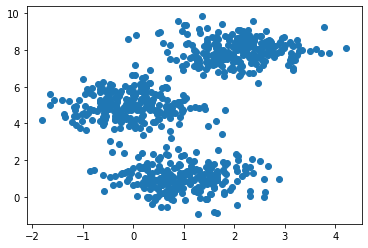

In [2]:
data, labels_true = datasets.make_blobs(n_samples=750, centers=[[1,1],[0,5],[2,8]], cluster_std=0.7,
                            random_state=0)


plt.scatter(data[:,0], data[:,1])

df = pd.DataFrame(data, columns=['X', 'Y'])

<ipython-input-1-e08db6ac7c55>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-e08db6ac7c55>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=

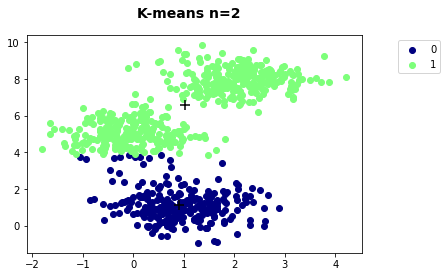

In [3]:
kmeans = cluster.KMeans(n_clusters=2)
label = kmeans.fit_predict(data)
df['label'] = label


fig = plt.figure()
fig.suptitle('K-means n=2', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)


for i in range(kmeans.n_clusters):
    plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))

for i in kmeans.cluster_centers_:
    plt.scatter(i[0], i[1], color='black', marker='+', s=100)
    
plt.legend(bbox_to_anchor=(1.25, 1))

Clustering with 3 clusters

<ipython-input-1-76fb897fa33c>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-76fb897fa33c>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=

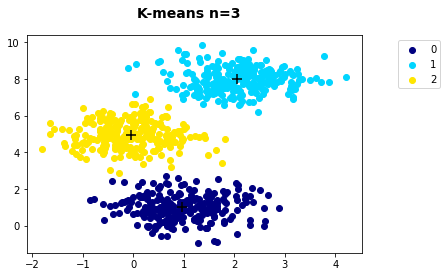

In [4]:
kmeans = cluster.KMeans(n_clusters=3)
label = kmeans.fit_predict(data)
df['label'] = label

fig = plt.figure()
fig.suptitle('K-means n=3', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

for i in range(kmeans.n_clusters):
    plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))

for i in kmeans.cluster_centers_:
    plt.scatter(i[0], i[1], color='black', marker='+', s=100)
    
plt.legend(bbox_to_anchor=(1.25, 1))

Clustering with 4 clusters

<ipython-input-1-dae570f48ffe>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-dae570f48ffe>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=

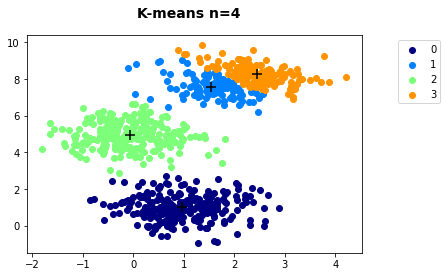

In [5]:
kmeans = cluster.KMeans(n_clusters=4)
label = kmeans.fit_predict(data)
df['label'] = label


fig = plt.figure()
fig.suptitle('K-means n=4', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)


for i in range(kmeans.n_clusters):
    plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
    
for i in kmeans.cluster_centers_:
    plt.scatter(i[0], i[1], color='black', marker='+', s=100)

plt.legend(bbox_to_anchor=(1.25, 1))

<ipython-input-1-0aff14253d88>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-0aff14253d88>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=

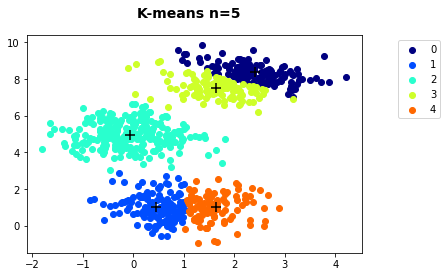

In [6]:
kmeans = cluster.KMeans(n_clusters=5)
label = kmeans.fit_predict(data)
df['label'] = label


fig = plt.figure()
fig.suptitle('K-means n=5', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)


for i in range(kmeans.n_clusters):
    plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
    
for i in kmeans.cluster_centers_:
    plt.scatter(i[0], i[1], color='black', marker='+', s=100)

plt.legend(bbox_to_anchor=(1.25, 1))

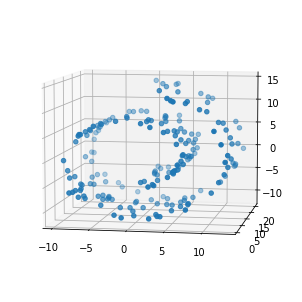

In [7]:
data, t = datasets.make_swiss_roll(n_samples=200, noise=0.1, random_state=0)
df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

ax.scatter(df.X, df.Y, df.Z, 'o')

<ipython-input-1-cb9c11940bdc>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-cb9c11940bdc>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))


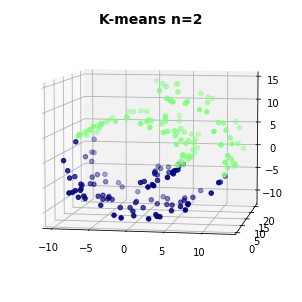

In [8]:

kmeans = cluster.KMeans(n_clusters=2)
label = kmeans.fit_predict(data, )

df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
fig.suptitle('K-means n=2', fontsize=14, fontweight='bold')

for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))


<ipython-input-1-a87e53ad7267>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-a87e53ad7267>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-a87e53ad7267>:14: DeprecationWarning: `np

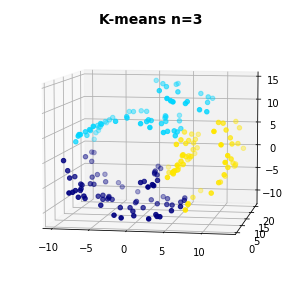

In [9]:

kmeans = cluster.KMeans(n_clusters=3)
label = kmeans.fit_predict(data, )

df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
fig.suptitle('K-means n=3', fontsize=14, fontweight='bold')

for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))


<ipython-input-1-4ae8f4bce688>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-4ae8f4bce688>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-4ae8f4bce688>:14: DeprecationWarning: `np

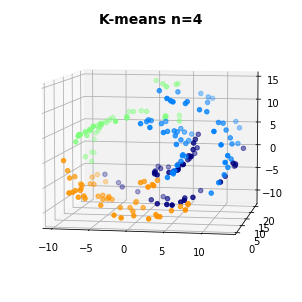

In [10]:

kmeans = cluster.KMeans(n_clusters=4)
label = kmeans.fit_predict(data, )

df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
fig.suptitle('K-means n=4', fontsize=14, fontweight='bold')

for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))


<ipython-input-1-cf01c1d1d2ad>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-cf01c1d1d2ad>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-cf01c1d1d2ad>:14: DeprecationWarning: `np

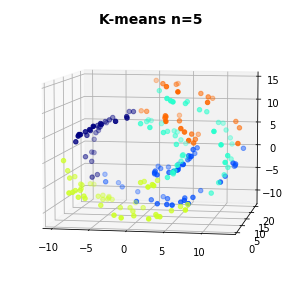

In [11]:

kmeans = cluster.KMeans(n_clusters=5)
label = kmeans.fit_predict(data, )

df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
fig.suptitle('K-means n=5', fontsize=14, fontweight='bold')

for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
